In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df_german = pd.read_csv("german_text_comparison.csv", sep=",")
df_swiss = pd.read_csv("swiss_text_comparison.csv", sep=",")
df_swiss_manual = pd.read_csv("swiss_text_comparison_manual.csv", sep=",")

In [72]:
def calculate_metrics(df: pd.DataFrame, lower: bool = False) -> pd.DataFrame:
    # Calculate average, median, and standard deviation for the metric columns
    if lower:
        metrics = ['wer_lower', 'cer_lower', 'bleu_score_lower']
    else:
        metrics = ['wer', 'cer', 'bert_score', 'bleu_score']
        
    return df[metrics].agg(['mean', 'median', 'std'])

In [73]:
calculate_metrics(df_german)

,wer,cer,bert_score,bleu_score
mean,0.300014,0.195093,0.913001,0.546219
median,0.212406,0.117891,0.940491,0.640833
std,0.264203,0.194858,0.074717,0.343295


In [74]:
calculate_metrics(df_german, True)

,wer_lower,cer_lower,bleu_score_lower
mean,0.286770,0.190569,0.557122
median,0.205263,0.111150,0.641201
std,0.253810,0.191950,0.337500


In [75]:
calculate_metrics(df_swiss)

,wer,cer,bert_score,bleu_score
mean,0.694426,0.442857,0.780007,7.976719e-02
median,0.712698,0.459777,0.781221,1.225851e-78
std,0.193882,0.187053,0.066401,1.449340e-01


In [76]:
calculate_metrics(df_swiss, True)

,wer_lower,cer_lower,bleu_score_lower
mean,0.680586,0.436079,8.524922e-02
median,0.700000,0.448518,2.255963e-78
std,0.192305,0.186901,1.506867e-01


In [77]:
calculate_metrics(df_swiss_manual)

,wer,cer,bert_score,bleu_score
mean,0.639388,0.395929,0.805181,1.092540e-01
median,0.636364,0.344353,0.802115,3.829767e-78
std,0.252962,0.284900,0.063567,1.677782e-01


In [78]:
calculate_metrics(df_swiss_manual, True)

,wer_lower,cer_lower,bleu_score_lower
mean,0.629866,0.391576,1.156416e-01
median,0.632997,0.341415,5.832845e-78
std,0.251250,0.284319,1.685950e-01


# Confusion matrix for DID

In [48]:
data_ch_only = {
    "Basel": [0.72, 0.23, 0.0069, 0.013, 0.0052, 0.026, 0.0052],
    "Bern": [0.14, 0.77, 0.017, 0.013, 0.00057, 0.0014, 0.059],
    "Innerschweiz": [0.0, 0.0057, 1.0, 0.0, 0.0, 0.0028, 0.0],
    "Ostschweiz": [0.014, 0.1, 0.0017, 0.81, 0.064, 0.0046, 0.00057],
    "Graubünden": [0.002, 0.0011, 0.0, 0.0014, 0.99, 0.0034, 0.0],
    "Wallis": [0.0091, 0.068, 0.0077, 0.022, 0.0074, 0.88, 0.0031],
    "Zürich": [0.0011, 0.094, 0.0063, 0.01, 0.00028, 0.0017, 0.88],
}
data_ch_only = {
    "Basel": [0.72, 0.14, 0.0, 0.014, 0.002, 0.0091, 0.0011],
    "Bern": [0.23, 0.77, 0.00057, 0.1, 0.0011, 0.068, 0.094],
    "Innerschweiz": [0.0069, 0.017, 1.0, 0.0017, 0.0, 0.0077, 0.0063],
    "Ostschweiz": [0.013, 0.013, 0.0, 0.81, 0.0014, 0.022, 0.01],
    "Graubünden": [0.0052, 0.00057, 0.0, 0.064, 0.99, 0.0074, 0.00028],
    "Wallis": [0.026, 0.0014, 0.00028, 0.0046, 0.0034, 0.88, 0.0017],
    "Zürich": [0.0052, 0.059, 0.0, 0.00057, 0.0, 0.0031, 0.88],
}
labels = ["Basel", "Bern", "Innerschweiz", "Ostschweiz", "Graubünden", "Wallis", "Zürich"]
df = pd.DataFrame(data_ch_only, index=labels)

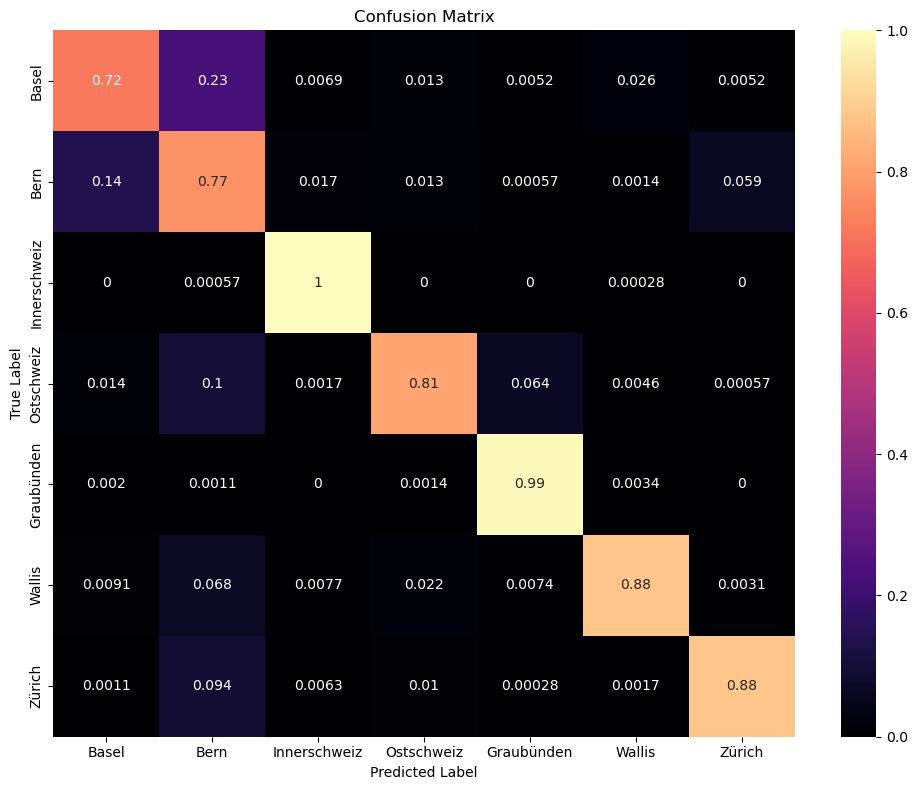

In [51]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df, annot=True, cmap="magma", xticklabels=labels, yticklabels=labels, cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

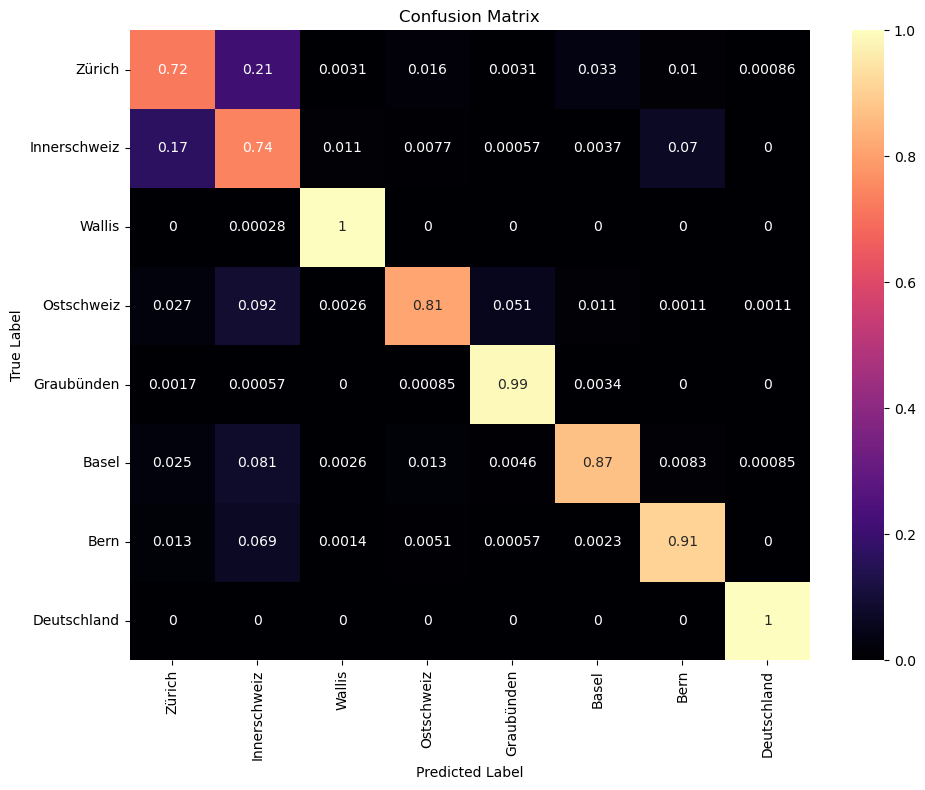

In [59]:
data_de = {
    "Zürich": [0.72, 0.17, 0.0, 0.027, 0.0017 , 0.025, 0.013, 0.0],
    "Innerschweiz": [0.21, 0.74, 0.00028, 0.092, 0.00057, 0.081, 0.069, 0.0],
    "Wallis": [0.0031, 0.011, 1.0, 0.0026, 0.0 , 0.0026, 0.0014, 0.0],
    "Ostschweiz": [0.016, 0.0077, 0.0, 0.81, 0.00085, 0.013, 0.0051, 0.0],
    "Graubünden": [0.0031, 0.00057, 0.0, 0.051, 0.99, 0.0046, 0.00057, 0.0],
    "Basel": [0.033, 0.0037, 0.0, 0.011, 0.0034, 0.87, 0.0023, 0.0],
    "Bern": [0.01, 0.07, 0.0, 0.0011, 0.0, 0.0083, 0.91, 0.0],
    "Deutschland": [0.00086, 0.0, 0.0, 0.0011, 0.0, 0.00085, 0.0, 1.0]
}
labels = ["Zürich", "Innerschweiz", "Wallis", "Ostschweiz", "Graubünden", "Basel", "Bern", "Deutschland"]
df = pd.DataFrame(data_de, index=labels)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df, annot=True, cmap="magma", xticklabels=labels, yticklabels=labels, cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()